Choose input method:
1: Enter data manually
2: Upload Excel file with sample data (single column)
 
Enter your choice (1 or 2): 1
Enter sample size (n): 25
Enter sample mean: 72
Enter sample standard deviation: 8
Enter confidence level (e.g., 0.95): 0.95


## Confidence Interval for Population Mean

**Sample Size (n): 25**

**Distribution Used: t-distribution**

**Sample Mean: 72.00**

**95% Confidence Interval: (68.70, 75.30)**

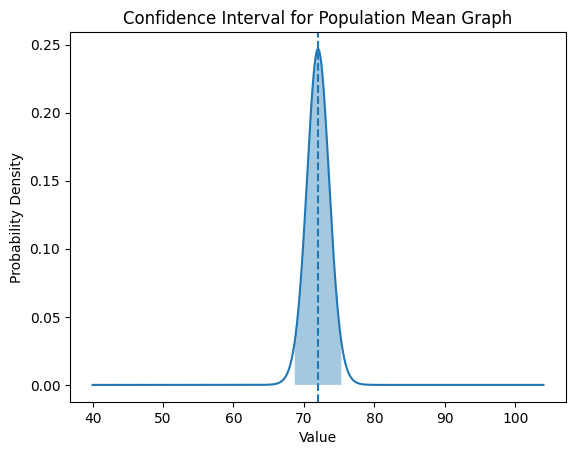

In [5]:
# Confidence Interval for Population Mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from IPython.display import display, Markdown
from google.colab import files
# ------------------ INPUT ------------------
print("Choose input method:")
print("1: Enter data manually")
print("2: Upload Excel file with sample data (single column)")
print(" ")
choice = input("Enter your choice (1 or 2): ")
if choice == "1":
    n = int(input("Enter sample size (n): "))
    sample_mean = float(input("Enter sample mean: "))
    sample_std = float(input("Enter sample standard deviation: "))
    confidence_level = float(input("Enter confidence level (e.g., 0.95): "))
elif choice == "2":
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_excel(file_name)
    display(df)
    sample_data = df.iloc[:, 0].dropna().values
    n = len(sample_data)
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    confidence_level = float(input("Enter confidence level (e.g., 0.95): "))
else:
    print("Invalid choice")
    exit()
# ------------------ CALCULATIONS ------------------
alpha = 1 - confidence_level
if n < 30:
    critical_value = t.ppf(1 - alpha/2, n-1)
    distribution = "t-distribution"
else:
    critical_value = norm.ppf(1 - alpha/2)
    distribution = "z-distribution"
margin_of_error = critical_value * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
# ------------------ OUTPUT ------------------
display(Markdown("## Confidence Interval for Population Mean"))
display(Markdown(f"**Sample Size (n): {n}**"))
display(Markdown(f"**Distribution Used: {distribution}**"))
display(Markdown(f"**Sample Mean: {sample_mean:.2f}**"))
display(Markdown(
    f"**{int(confidence_level*100)}% Confidence Interval: "
    f"({lower_bound:.2f}, {upper_bound:.2f})**"
))
# ------------------ GRAPH ------------------
x = np.linspace(sample_mean - 4*sample_std, sample_mean + 4*sample_std, 1000)
if distribution == "t-distribution":
    y = t.pdf(x, df=n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))
else:
    y = norm.pdf(x, loc=sample_mean, scale=sample_std/np.sqrt(n))
plt.figure()
plt.plot(x, y)
# Shade confidence interval
x_fill = np.linspace(lower_bound, upper_bound, 500)
if distribution == "t-distribution":
    y_fill = t.pdf(x_fill, df=n-1, loc=sample_mean, scale=sample_std/np.sqrt(n))
else:
    y_fill = norm.pdf(x_fill, loc=sample_mean, scale=sample_std/np.sqrt(n))
plt.fill_between(x_fill, y_fill, alpha=0.4)
# Mean line
plt.axvline(sample_mean, linestyle='--')
plt.title("Confidence Interval for Population Mean Graph")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

Choose input method:
1: Enter data manually
2: Upload Excel file with sample data (single column)
 
Enter choice (1 or 2): 1
Enter sample size (n): 20
Enter sample variance (s^2): 16
Enter confidence level (e.g., 0.95): 0.90


## Confidence Interval for Population Variance

**Sample Size (n): 20**

**Sample Variance (s²): 16.00**

**90% Confidence Interval: (10.09, 30.05)**

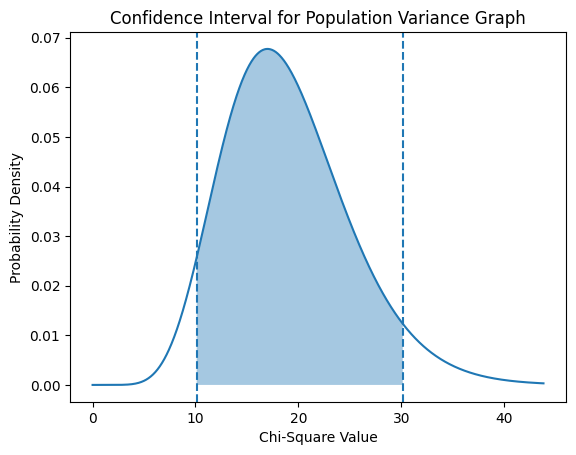

In [8]:
# Confidence Interval for Population Variance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from IPython.display import display, Markdown
from google.colab import files
# ------------------ INPUT ------------------
print("Choose input method:")
print("1: Enter data manually")
print("2: Upload Excel file with sample data (single column)")
print(" ")
choice = input("Enter choice (1 or 2): ")
if choice == "1":
    n = int(input("Enter sample size (n): "))
    sample_variance = float(input("Enter sample variance (s^2): "))
    confidence_level = float(input("Enter confidence level (e.g., 0.95): "))
elif choice == "2":
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_excel(file_name)
    display(df)
    sample_data = df.iloc[:, 0].dropna().values
    n = len(sample_data)
    sample_variance = np.var(sample_data, ddof=1)
    confidence_level = float(input("Enter confidence level (e.g., 0.95): "))
else:
    print("Invalid choice")
    exit()
# ------------------ CALCULATIONS ------------------
alpha = 1 - confidence_level
dfree = n - 1
chi2_lower = chi2.ppf(alpha / 2, dfree)
chi2_upper = chi2.ppf(1 - alpha / 2, dfree)
lower_bound = (dfree * sample_variance) / chi2_upper
upper_bound = (dfree * sample_variance) / chi2_lower
# ------------------ OUTPUT ------------------
display(Markdown("## Confidence Interval for Population Variance"))
display(Markdown(f"**Sample Size (n): {n}**"))
display(Markdown(f"**Sample Variance (s²): {sample_variance:.2f}**"))
display(Markdown(
    f"**{int(confidence_level*100)}% Confidence Interval: "
    f"({lower_bound:.2f}, {upper_bound:.2f})**"
))
# ------------------ GRAPH ------------------
x = np.linspace(0, chi2.ppf(0.999, dfree), 1000)
y = chi2.pdf(x, dfree)
plt.figure()
plt.plot(x, y)
# Shade confidence interval region
x_fill = np.linspace(chi2_lower, chi2_upper, 500)
y_fill = chi2.pdf(x_fill, dfree)
plt.fill_between(x_fill, y_fill, alpha=0.4)
# Critical lines
plt.axvline(chi2_lower, linestyle='--')
plt.axvline(chi2_upper, linestyle='--')
plt.title("Confidence Interval for Population Variance Graph")
plt.xlabel("Chi-Square Value")
plt.ylabel("Probability Density")
plt.show()

Choose input method:
1: Enter data manually
2: Upload Excel file with sample data (single column)
 
Enter choice (1 or 2): 1
Enter sample size (n): 15
Enter sample standard deviation: 4
Enter confidence level (e.g., 0.95): 0.99


## Confidence Interval for Population Standard Deviation

**Sample Size (n): 15**

**Sample Standard Deviation (s): 4.00**

**99% Confidence Interval: (2.67, 7.41)**

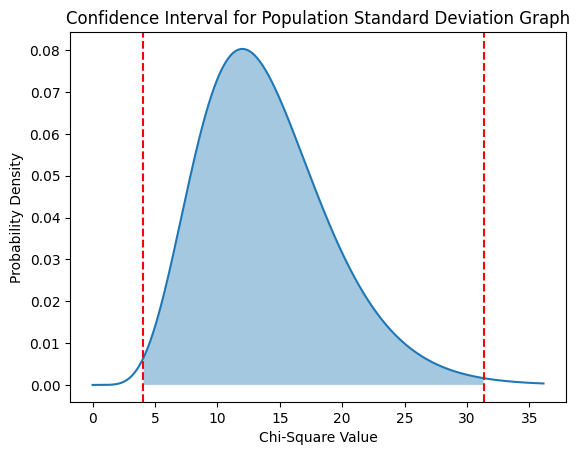

In [9]:
# Confidence Interval for Population Standard Deviation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from IPython.display import display, Markdown
from google.colab import files
# ------------------ INPUT ------------------
print("Choose input method:")
print("1: Enter data manually")
print("2: Upload Excel file with sample data (single column)")
print(" ")
choice = input("Enter choice (1 or 2): ")
if choice == "1":
    n = int(input("Enter sample size (n): "))
    sample_std = float(input("Enter sample standard deviation: "))
    confidence_level = float(input("Enter confidence level (e.g., 0.95): "))
elif choice == "2":
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_excel(file_name)
    display(df)
    sample_data = df.iloc[:, 0].dropna().values
    n = len(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    confidence_level = float(input("Enter confidence level (e.g., 0.95): "))
else:
    print("Invalid choice")
    exit()
# ------------------ CALCULATIONS ------------------
alpha = 1 - confidence_level
dfree = n - 1
chi2_lower = chi2.ppf(alpha / 2, dfree)
chi2_upper = chi2.ppf(1 - alpha / 2, dfree)
lower_std = np.sqrt((dfree * sample_std**2) / chi2_upper)
upper_std = np.sqrt((dfree * sample_std**2) / chi2_lower)
# ------------------ OUTPUT ------------------
display(Markdown("## Confidence Interval for Population Standard Deviation"))
display(Markdown(f"**Sample Size (n): {n}**"))
display(Markdown(f"**Sample Standard Deviation (s): {sample_std:.2f}**"))
display(Markdown(
    f"**{int(confidence_level*100)}% Confidence Interval: "
    f"({lower_std:.2f}, {upper_std:.2f})**"
))
# ------------------ GRAPH ------------------
x = np.linspace(0, chi2.ppf(0.999, dfree), 1000)
y = chi2.pdf(x, dfree)
plt.figure()
plt.plot(x, y)
# Shade confidence interval region
x_fill = np.linspace(chi2_lower, chi2_upper, 500)
y_fill = chi2.pdf(x_fill, dfree)
plt.fill_between(x_fill, y_fill, alpha=0.4)
# Critical lines
plt.axvline(chi2_lower, linestyle='--', color='red')
plt.axvline(chi2_upper, linestyle='--', color='red')
plt.title("Confidence Interval for Population Standard Deviation Graph")
plt.xlabel("Chi-Square Value")
plt.ylabel("Probability Density")
plt.show()

Input method: 1=Manual, 2=Excel file: 2


Saving one_sample.xlsx to one_sample (1).xlsx


,SampleData
0,72
1,75
2,70
3,68
4,74
5,73
6,69
7,71
8,70
9,72


Population mean (H0): 70
Tail type (one/two): two


## Hypothesis Testing for Population Mean

**T-statistic:** 1.9932

**P-value:** 0.0774

**Result: Fail to Reject H0 at α=0.05**

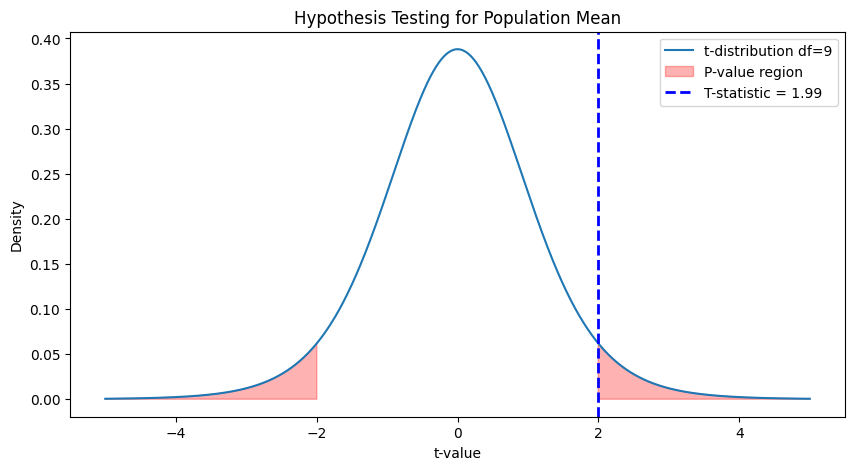

In [11]:
# Hypothesis Testing for Population Mean
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Markdown
# Functions
def one_sample_t_test(sample_mean, sample_std, n, pop_mean, tail='two', direction='>'):
    t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
    if tail.lower() == 'two':
        p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
    elif tail.lower() == 'one':
        if direction == '>':
            p_value = 1 - t.cdf(t_stat, df=n-1)
        elif direction == '<':
            p_value = t.cdf(t_stat, df=n-1)
        else:
            raise ValueError("Invalid direction for one-tailed test")
    else:
        raise ValueError("Invalid tail option")
    return t_stat, p_value, n-1
def two_sample_t_test(mean1, std1, n1, mean2, std2, n2, tail='two', direction='>'):
    se = np.sqrt(std1**2/n1 + std2**2/n2)
    t_stat = (mean1 - mean2) / se
    df = ((std1**2/n1 + std2**2/n2)**2) / (((std1**2/n1)**2)/(n1-1) + ((std2**2/n2)**2)/(n2-1))
    if tail.lower() == 'two':
        p_value = 2 * (1 - t.cdf(abs(t_stat), df=df))
    elif tail.lower() == 'one':
        if direction == '>':
            p_value = 1 - t.cdf(t_stat, df=df)
        elif direction == '<':
            p_value = t.cdf(t_stat, df=df)
        else:
            raise ValueError("Invalid direction for one-tailed test")
    else:
        raise ValueError("Invalid tail option")
    return t_stat, p_value, df
def plot_t_distribution(t_stat, df, tail='two', direction='>', p_value=None):
    # Dynamic x-range
    x_min = min(-5, t_stat - 3)
    x_max = max(5, t_stat + 3)
    x = np.linspace(x_min, x_max, 1000)
    y = t.pdf(x, df)
    plt.figure(figsize=(10,5))
    plt.plot(x, y, label=f't-distribution df={df}')
    # Shade p-value area
    if tail.lower() == 'two':
        plt.fill_between(x, 0, y, where=(x <= -abs(t_stat)) | (x >= abs(t_stat)), color='red', alpha=0.3, label='P-value region')
    elif tail.lower() == 'one':
        if direction == '>':
            plt.fill_between(x, 0, y, where=(x >= t_stat), color='red', alpha=0.3, label='P-value region')
        else:
            plt.fill_between(x, 0, y, where=(x <= t_stat), color='red', alpha=0.3, label='P-value region')
    plt.axvline(t_stat, color='blue', linestyle='--', linewidth=2, label=f'T-statistic = {t_stat:.2f}')
    plt.title("Hypothesis Testing for Population Mean")
    plt.xlabel("t-value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
# Main Program
choice = input("Input method: 1=Manual, 2=Excel file: ")
if choice == '1':
    test_type = input("One-sample or Two-sample? (1 or 2): ")
    if test_type == '1':
        n = int(input("Sample size (n): "))
        sample_mean = float(input("Sample mean: "))
        sample_std = float(input("Sample std dev: "))
        pop_mean = float(input("Population mean (H0): "))
        tail = input("Tail type (one/two): ").lower()
        direction = '>'
        if tail == 'one':
            direction = input("Direction for one-tailed test ('>' or '<'): ")
        t_stat, p_value, df = one_sample_t_test(sample_mean, sample_std, n, pop_mean, tail, direction)
    elif test_type == '2':
        n1 = int(input("Sample 1 size: "))
        mean1 = float(input("Sample 1 mean: "))
        std1 = float(input("Sample 1 std dev: "))
        n2 = int(input("Sample 2 size: "))
        mean2 = float(input("Sample 2 mean: "))
        std2 = float(input("Sample 2 std dev: "))
        tail = input("Tail type (one/two): ").lower()
        direction = '>'
        if tail == 'one':
            direction = input("Direction for one-tailed test ('>' or '<'): ")
        t_stat, p_value, df = two_sample_t_test(mean1, std1, n1, mean2, std2, n2, tail, direction)
elif choice == '2':
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df_excel = pd.read_excel(file_name)
    display(df_excel)
    if df_excel.shape[1] == 1:
        sample_data = df_excel.iloc[:,0].dropna().values
        n = len(sample_data)
        sample_mean = np.mean(sample_data)
        sample_std = np.std(sample_data, ddof=1)
        pop_mean = float(input("Population mean (H0): "))
        tail = input("Tail type (one/two): ").lower()
        direction = '>'
        if tail == 'one':
            direction = input("Direction for one-tailed test ('>' or '<'): ")
        t_stat, p_value, df = one_sample_t_test(sample_mean, sample_std, n, pop_mean, tail, direction)
    elif df_excel.shape[1] == 2:
        sample1 = df_excel.iloc[:,0].dropna().values
        sample2 = df_excel.iloc[:,1].dropna().values
        n1, n2 = len(sample1), len(sample2)
        mean1, mean2 = np.mean(sample1), np.mean(sample2)
        std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
        tail = input("Tail type (one/two): ").lower()
        direction = '>'
        if tail == 'one':
            direction = input("Direction for one-tailed test ('>' or '<'): ")
        t_stat, p_value, df = two_sample_t_test(mean1, std1, n1, mean2, std2, n2, tail, direction)
    else:
        print("Excel must have 1 or 2 columns")
        exit()
else:
    print("Invalid choice")
    exit()
# Display Results
display(Markdown("## Hypothesis Testing for Population Mean"))
display(Markdown(f"**T-statistic:** {t_stat:.4f}"))
display(Markdown(f"**P-value:** {p_value:.4f}"))
alpha = 0.05
if p_value < alpha:
    display(Markdown(f"**Result: Reject H0 at α={alpha}**"))
else:
    display(Markdown(f"**Result: Fail to Reject H0 at α={alpha}**"))
# Plot t-distribution with shaded p-value region
plot_t_distribution(t_stat, df, tail, direction, p_value)

Input method: 1=Manual, 2=Excel file: 2


Saving one_sample.xlsx to one_sample (2).xlsx


,SampleData
0,72
1,75
2,70
3,68
4,74
5,73
6,69
7,71
8,70
9,72


Population variance (H0): 16
Tail type (one/two): one
Direction for one-tailed test ('>' or '<'): >


## Hypothesis Testing for Population Variance

**Chi-square statistic:** 2.7750

**P-value:** 0.9726

**Result: Fail to Reject H0 at α=0.05**

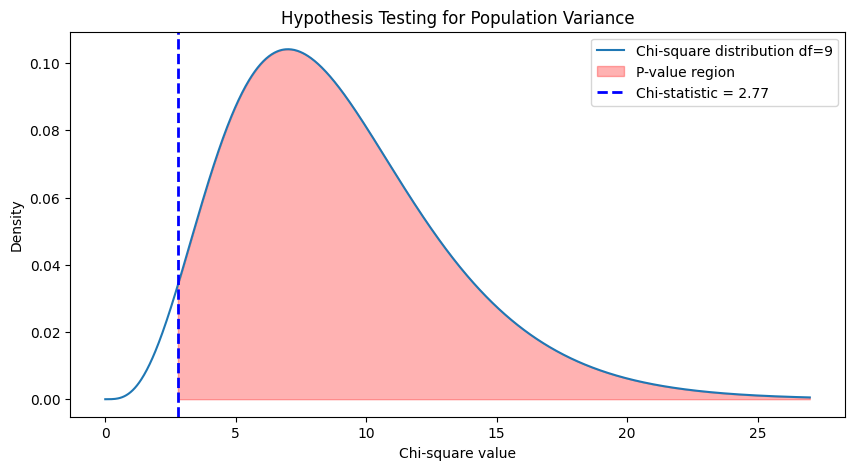

In [12]:
# Hypothesis Testing for Population Variance
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Markdown
# Functions
def one_sample_variance_test(sample_var, n, pop_var, tail='two', direction='>'):
    chi_stat = (n - 1) * sample_var / pop_var
    df = n - 1
    if tail.lower() == 'two':
        p_value = 2 * min(chi2.cdf(chi_stat, df), 1 - chi2.cdf(chi_stat, df))
    elif tail.lower() == 'one':
        if direction == '>':
            p_value = 1 - chi2.cdf(chi_stat, df)
        elif direction == '<':
            p_value = chi2.cdf(chi_stat, df)
        else:
            raise ValueError("Invalid direction for one-tailed test")
    else:
        raise ValueError("Invalid tail option")
    return chi_stat, p_value, df
def plot_chi2_distribution(chi_stat, df, tail='two', direction='>'):
    x_min = 0
    x_max = max(chi_stat + df, df * 3)
    x = np.linspace(x_min, x_max, 1000)
    y = chi2.pdf(x, df)
    plt.figure(figsize=(10,5))
    plt.plot(x, y, label=f'Chi-square distribution df={df}')
    # Shade p-value area
    if tail.lower() == 'two':
        plt.fill_between(x, 0, y, where=(x <= chi_stat) | (x >= chi2.ppf(1 - chi2.cdf(chi_stat, df), df)),
                         color='red', alpha=0.3, label='P-value region')
    elif tail.lower() == 'one':
        if direction == '>':
            plt.fill_between(x, 0, y, where=(x >= chi_stat), color='red', alpha=0.3, label='P-value region')
        else:
            plt.fill_between(x, 0, y, where=(x <= chi_stat), color='red', alpha=0.3, label='P-value region')
    plt.axvline(chi_stat, color='blue', linestyle='--', linewidth=2, label=f'Chi-statistic = {chi_stat:.2f}')
    plt.title("Hypothesis Testing for Population Variance")
    plt.xlabel("Chi-square value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
# Main Program
choice = input("Input method: 1=Manual, 2=Excel file: ")
if choice == '1':
    n = int(input("Sample size (n): "))
    sample_var = float(input("Sample variance: "))
    pop_var = float(input("Population variance (H0): "))
    tail = input("Tail type (one/two): ").lower()
    direction = '>'
    if tail == 'one':
        direction = input("Direction for one-tailed test ('>' or '<'): ")
    chi_stat, p_value, df = one_sample_variance_test(sample_var, n, pop_var, tail, direction)
elif choice == '2':
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df_excel = pd.read_excel(file_name)
    display(df_excel)
    sample_data = df_excel.iloc[:,0].dropna().values
    n = len(sample_data)
    sample_var = np.var(sample_data, ddof=1)
    pop_var = float(input("Population variance (H0): "))
    tail = input("Tail type (one/two): ").lower()
    direction = '>'
    if tail == 'one':
        direction = input("Direction for one-tailed test ('>' or '<'): ")
    chi_stat, p_value, df = one_sample_variance_test(sample_var, n, pop_var, tail, direction)
else:
    print("Invalid choice")
    exit()
# Display Results
display(Markdown("## Hypothesis Testing for Population Variance"))
display(Markdown(f"**Chi-square statistic:** {chi_stat:.4f}"))
display(Markdown(f"**P-value:** {p_value:.4f}"))
alpha = 0.05
if p_value < alpha:
    display(Markdown(f"**Result: Reject H0 at α={alpha}**"))
else:
    display(Markdown(f"**Result: Fail to Reject H0 at α={alpha}**"))
# Plot chi-square distribution with shaded p-value
plot_chi2_distribution(chi_stat, df, tail, direction)

Input method: 1=Manual, 2=Excel file: 2


Saving two_sample.xlsx to two_sample.xlsx


,Sample1,Sample2
0,72,68
1,75,70
2,70,69
3,68,71
4,74,70
5,73,72
6,69,69
7,71,68
8,70,71
9,72,70


Population standard deviation (H0): 4
Tail type (one/two): two


## Hypothesis Testing for Population Standard Deviation

**Chi-square statistic:** 2.7750

**P-value:** 0.0549

**Result: Fail to Reject H0 at α=0.05**

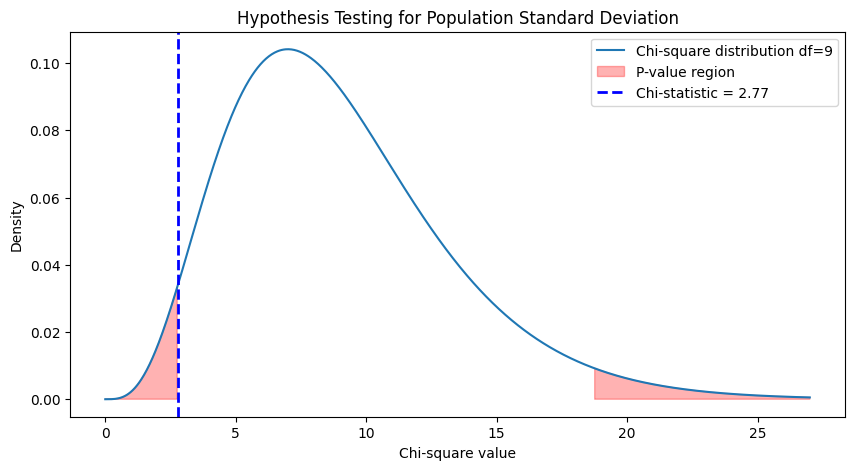

In [13]:
# Hypothesis Testing for Population Standard Deviation
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Markdown
# Functions
def one_sample_std_test(sample_std, n, pop_std, tail='two', direction='>'):
    # Convert standard deviations to variances
    sample_var = sample_std ** 2
    pop_var = pop_std ** 2
    chi_stat = (n - 1) * sample_var / pop_var
    df = n - 1
    if tail.lower() == 'two':
        p_value = 2 * min(chi2.cdf(chi_stat, df), 1 - chi2.cdf(chi_stat, df))
    elif tail.lower() == 'one':
        if direction == '>':
            p_value = 1 - chi2.cdf(chi_stat, df)
        elif direction == '<':
            p_value = chi2.cdf(chi_stat, df)
        else:
            raise ValueError("Invalid direction for one-tailed test")
    else:
        raise ValueError("Invalid tail option")
    return chi_stat, p_value, df
def plot_chi2_distribution_std(chi_stat, df, tail='two', direction='>'):
    x_min = 0
    x_max = max(chi_stat + df, df * 3)
    x = np.linspace(x_min, x_max, 1000)
    y = chi2.pdf(x, df)
    plt.figure(figsize=(10,5))
    plt.plot(x, y, label=f'Chi-square distribution df={df}')
    # Shade p-value area
    if tail.lower() == 'two':
        plt.fill_between(x, 0, y, where=(x <= chi_stat) | (x >= chi2.ppf(1 - chi2.cdf(chi_stat, df), df)),
                         color='red', alpha=0.3, label='P-value region')
    elif tail.lower() == 'one':
        if direction == '>':
            plt.fill_between(x, 0, y, where=(x >= chi_stat), color='red', alpha=0.3, label='P-value region')
        else:
            plt.fill_between(x, 0, y, where=(x <= chi_stat), color='red', alpha=0.3, label='P-value region')
    plt.axvline(chi_stat, color='blue', linestyle='--', linewidth=2, label=f'Chi-statistic = {chi_stat:.2f}')
    plt.title("Hypothesis Testing for Population Standard Deviation")
    plt.xlabel("Chi-square value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
# Main Program
choice = input("Input method: 1=Manual, 2=Excel file: ")
if choice == '1':
    n = int(input("Sample size (n): "))
    sample_std = float(input("Sample standard deviation: "))
    pop_std = float(input("Population standard deviation (H0): "))
    tail = input("Tail type (one/two): ").lower()
    direction = '>'
    if tail == 'one':
        direction = input("Direction for one-tailed test ('>' or '<'): ")
    chi_stat, p_value, df = one_sample_std_test(sample_std, n, pop_std, tail, direction)
elif choice == '2':
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df_excel = pd.read_excel(file_name)
    display(df_excel)
    sample_data = df_excel.iloc[:,0].dropna().values
    n = len(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    pop_std = float(input("Population standard deviation (H0): "))
    tail = input("Tail type (one/two): ").lower()
    direction = '>'
    if tail == 'one':
        direction = input("Direction for one-tailed test ('>' or '<'): ")
    chi_stat, p_value, df = one_sample_std_test(sample_std, n, pop_std, tail, direction)
else:
    print("Invalid choice")
    exit()
# Display Results
display(Markdown("## Hypothesis Testing for Population Standard Deviation"))
display(Markdown(f"**Chi-square statistic:** {chi_stat:.4f}"))
display(Markdown(f"**P-value:** {p_value:.4f}"))
alpha = 0.05
if p_value < alpha:
    display(Markdown(f"**Result: Reject H0 at α={alpha}**"))
else:
    display(Markdown(f"**Result: Fail to Reject H0 at α={alpha}**"))
# Plot chi-square distribution with shaded p-value
plot_chi2_distribution_std(chi_stat, df, tail, direction)